# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [8]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [4]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

In [13]:
def GUC_Distance( Data_points, Cluster_Centroids ,Distance_Type):
    """
    Calculate the distance between a set of cluster centroids and all the data points.
    
    Parameters:
    Cluster_Centroids (np.array): Array of cluster centroids.
    Data_points (np.array): Array of data points.
    Distance_Type (str): Type of distance to calculate. Can be 'euclidean' or 'pearson'.
    
    Returns:
    np.array: Matrix with rows equal to data points and columns equal to K.
    """
    
    if Distance_Type == 'euclidean':
        Cluster_Distances = euclidean_distances(Data_points, Cluster_Centroids)
    elif Distance_Type == 'pearson':
        std_data_points = (Data_points - np.mean(Data_points, axis=0)) / np.std(Data_points, axis=0)
        std_centroids = (Cluster_Centroids - np.mean(Cluster_Centroids, axis=0)) / np.std(Cluster_Centroids, axis=0)
        cosine_dist = 1 - cosine_distances(std_data_points, std_centroids)
        Cluster_Distances = np.sqrt(2 * (1 - cosine_dist))
    else:
        raise ValueError("Invalid distance type. Must be 'euclidean' or 'pearson'.")
    return Cluster_Distances

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [14]:
def GUC_Kmeans(data_points, num_clusters, distance_type):
    # Initialize cluster centroids randomly
    centroids = data_points[np.random.choice(range(data_points.shape[0]), size=num_clusters, replace=False)]
    prev_centroids = None
    prev_clusters = None
    prev_distances = None
    stopping_condition = 1e-5
    max_iterations = 1000
    iteration = 0

    while True:
        # Cluster assignment
        Final_Cluster_Distance = GUC_Distance(data_points,centroids , distance_type)
        cluster_assignments = np.argmin(Final_Cluster_Distance, axis=1)

        # Calculate mean square distance for each cluster
        mean_squared_distances = []
        for i in range(num_clusters):
            cluster_points = data_points[cluster_assignments == i]
            mean_squared_distance = np.mean(cdist(cluster_points, [centroids[i]], metric=distance_type) ** 2)
            mean_squared_distances.append(mean_squared_distance)

        # Update stopping condition
        total_mean_squared_distance = np.sum(mean_squared_distances)
        stopping_criterion = np.abs(total_mean_squared_distance - (prev_distances if prev_distances else 0))

        # Check stopping condition
        if stopping_criterion < stopping_condition:
            break

        # Update centroids
        for i in range(num_clusters):
            centroids[i] = np.mean(data_points[cluster_assignments == i], axis=0)

        # Update previous values
        prev_centroids = centroids.copy()
        prev_clusters = cluster_assignments.copy()
        prev_distances = total_mean_squared_distance

        # Check maximum iterations
        iteration += 1
        if iteration >= max_iterations:
            break

    # Calculate cluster metric
    Cluster_metric = np.sum(mean_squared_distances)

    return [ Final_Cluster_Distance , Cluster_metric ]

In [17]:
from sklearn.metrics import silhouette_score

In [22]:
def test_kmeans(data_points, distance_type):
    cluster_metrics = []
    final_cluster_distances = []
    num_clusters_range = range(2, 11)

    for num_clusters in num_clusters_range:
        final_cluster_distance, cluster_metric = GUC_Kmeans(data_points, num_clusters, distance_type)
        final_cluster_distances.append(final_cluster_distance)
        cluster_metrics.append(cluster_metric)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(num_clusters_range, cluster_metrics, marker='o', color='blue', linestyle='-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.title('Cluster Performance vs Number of Clusters')
    plt.grid(True)
    plt.show()

    return final_cluster_distances, cluster_metrics

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [6]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [7]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

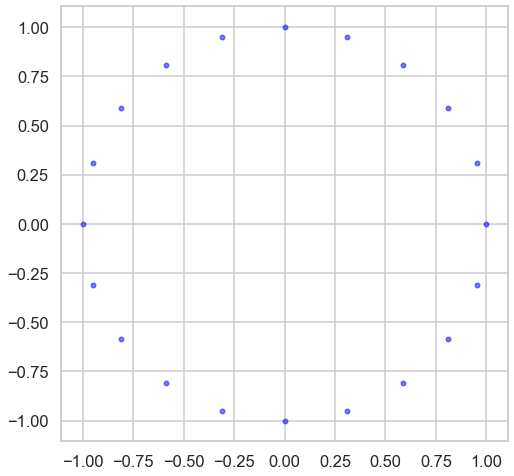

In [5]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

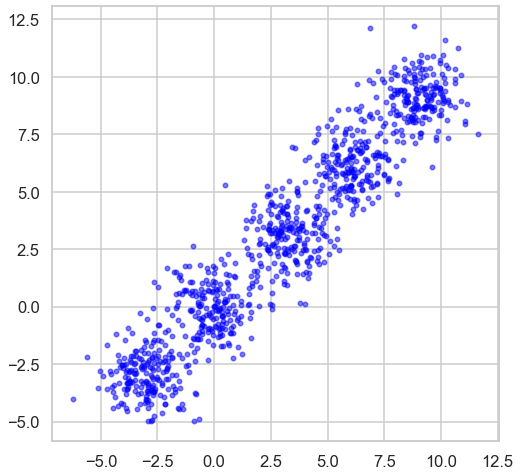

In [6]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

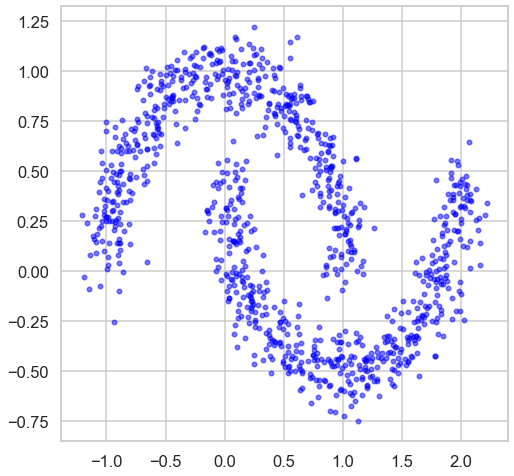

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

## Apply the GUC_Kmean function to 2D Data by Example 1

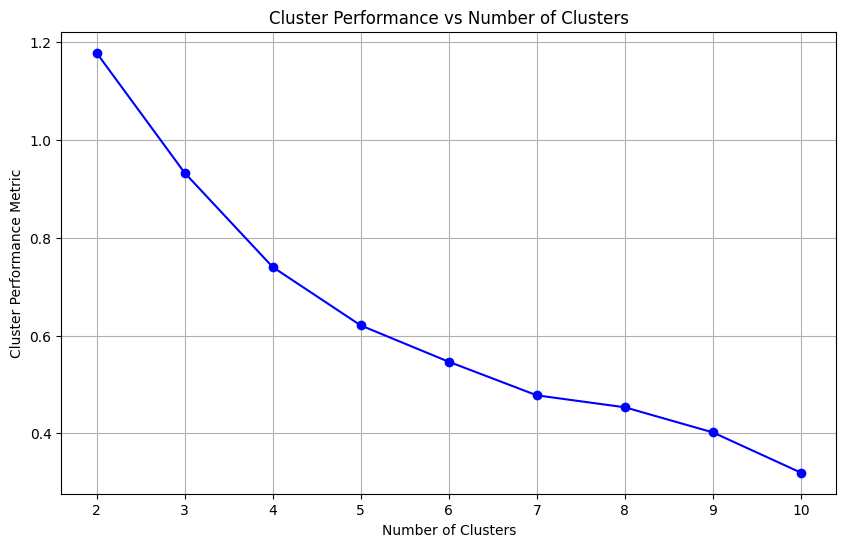

([array([[1.50271921, 0.59753276],
         [1.55602699, 0.39718511],
         [1.57397741, 0.29847205],
         [1.55602699, 0.39718511],
         [1.50271921, 0.59753276],
         [1.41569805, 0.81697362],
         [1.29776254, 1.02886994],
         [1.15301781, 1.22153242],
         [0.9872753 , 1.38769938],
         [0.80913482, 1.52211597],
         [0.63303642, 1.62087554],
         [0.48752452, 1.6812278 ],
         [0.42602259, 1.70152795],
         [0.48752452, 1.6812278 ],
         [0.63303642, 1.62087554],
         [0.80913482, 1.52211597],
         [0.9872753 , 1.38769938],
         [1.15301781, 1.22153242],
         [1.29776254, 1.02886994],
         [1.41569805, 0.81697362]]),
  array([[1.61820776, 0.18632607, 1.58919779],
         [1.47137467, 0.33817965, 1.72101383],
         [1.2892111 , 0.5878037 , 1.81077537],
         [1.07665553, 0.83996083, 1.85622577],
         [0.83996083, 1.07665553, 1.85622577],
         [0.5878037 , 1.2892111 , 1.81077537],
         [0.3381

In [24]:
angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
X = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()

test_kmeans(X, distance_type='euclidean')

## Apply the GUC_Kmean function to 2D Data by example 2

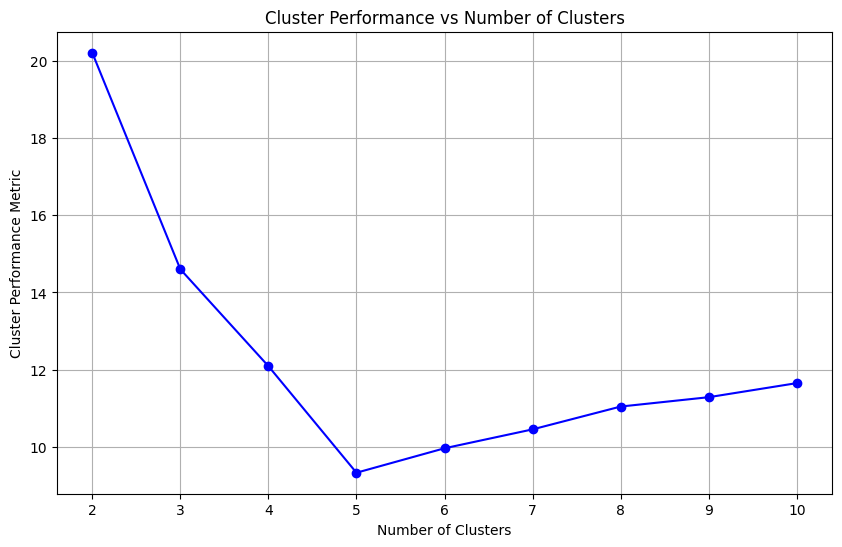

([array([[12.99548049,  2.36726995],
         [11.7196219 ,  1.21629003],
         [13.57112988,  2.90992007],
         ...,
         [ 4.75948787, 15.4055619 ],
         [ 3.15370119, 13.76250946],
         [ 3.12056153, 13.75574305]]),
  array([[15.40448278,  9.01324439,  1.72865185],
         [14.12252878,  7.76005054,  0.68889481],
         [15.97950622,  9.59221676,  2.24250796],
         ...,
         [ 2.36269612,  8.73743798, 16.07156664],
         [ 0.98188577,  7.08492773, 14.43173378],
         [ 0.85323132,  7.07442219, 14.42466392]]),
  array([[ 4.23789126, 10.04283743,  0.50838411, 16.04002731],
         [ 3.00271661,  8.77683134,  1.59612616, 14.75830614],
         [ 4.80052203, 10.61879859,  0.38732587, 16.61553072],
         ...,
         [13.51666459,  7.70708816, 17.92673962,  1.740294  ],
         [11.8733933 ,  6.06775069, 16.28448484,  0.70596195],
         [11.86570468,  6.05284224, 16.27852033,  0.51310243]]),
  array([[ 8.48614347,  3.98202279, 16.79305925,  0.

In [23]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

test_kmeans(X,distance_type='euclidean')

## Apply Kmeans function to 2D data points in the example 3

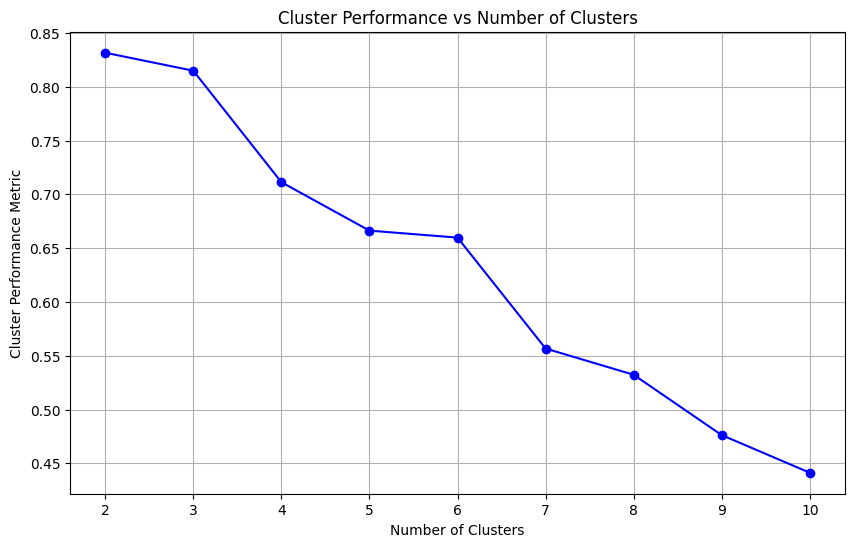

([array([[0.4041305 , 1.95105726],
         [0.78661303, 2.1877816 ],
         [0.26531563, 1.29598947],
         ...,
         [0.88510876, 0.94250759],
         [0.43899699, 1.52226731],
         [2.18101603, 0.62623368]]),
  array([[0.17083723, 2.28995051, 1.15045802],
         [0.50995095, 2.53198939, 1.43124665],
         [0.62562192, 1.63928393, 0.49804523],
         ...,
         [1.24195608, 1.22712999, 0.46808671],
         [0.68503417, 1.83934609, 0.78014594],
         [2.54760197, 0.29001917, 1.42736636]]),
  array([[2.44223772, 0.3233476 , 0.86379558, 1.58314895],
         [2.72074316, 0.33697042, 1.34004099, 1.70470698],
         [1.80633713, 0.75564794, 0.43908219, 0.91592668],
         ...,
         [1.32416773, 1.4083876 , 0.3401224 , 0.90780613],
         [1.95992699, 0.86677847, 0.34298423, 1.29042276],
         [0.26244952, 2.66715166, 1.78642019, 1.10781741]]),
  array([[0.95571933, 1.88758949, 2.5029758 , 1.12542999, 0.30289418],
         [1.46499331, 2.04565017, 2

In [26]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise=.1)

test_kmeans(X, distance_type='euclidean')

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [28]:
customer_df = pd.read_csv("Customer data.csv")
customer_df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [42]:
# Generate random cluster centroids
n_clusters = 4
clusters = np.random.rand(n_clusters, customer_df.shape[1])

# Calculate Euclidean distance
dist_euclidean = GUC_Distance(clusters, customer_df.values, 'euclidean')

# Calculate Pearson correlation distance
dist_pearson = GUC_Distance(clusters, customer_df.values, 'pearson')

# Print the resulting matrices
print("Euclidean distance matrix:")
print(dist_euclidean)
print("\nPearson correlation distance matrix:")
print(dist_pearson)

Euclidean distance matrix:
[[1.00000078e+08 1.00000078e+08 1.00000078e+08 1.00000078e+08]
 [1.00000115e+08 1.00000115e+08 1.00000115e+08 1.00000115e+08]
 [1.00000042e+08 1.00000042e+08 1.00000042e+08 1.00000042e+08]
 ...
 [1.00002035e+08 1.00002035e+08 1.00002035e+08 1.00002035e+08]
 [1.00002046e+08 1.00002047e+08 1.00002047e+08 1.00002047e+08]
 [1.00002023e+08 1.00002023e+08 1.00002023e+08 1.00002023e+08]]

Pearson correlation distance matrix:
[[1.69259449 1.4540357  1.46212222 0.92800812]
 [1.50924235 1.0302404  1.59842465 1.35683185]
 [1.80102414 1.22852834 1.25181951 1.17896666]
 ...
 [1.45978175 1.54901429 1.17792452 1.46349025]
 [1.15629538 1.2409066  1.56914598 1.61613439]
 [1.4649923  1.4653501  1.18456464 1.51161614]]


In [42]:
clustered_data = GUC_Kmeans(customer_df.values, num_clusters=5, distance_type='euclidean')

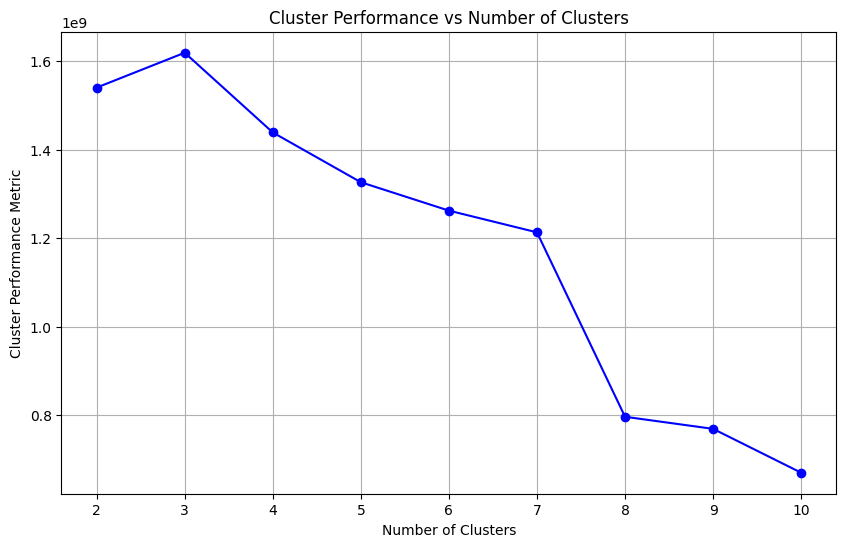

([array([[ 44992.04418561,  21079.33172565],
         [ 18897.34753874,  47166.62080328],
         [ 80449.35800863,  14450.17764597],
         ...,
         [ 83265.53450258,  17242.76630938],
         [ 71699.09170973,   5723.1734204 ],
         [101247.86666395,  35214.68332954]]),
  array([[  6743.97672001,  72909.24070377,  34226.74968501],
         [ 19443.68869325,  46808.03183215,  60321.17457411],
         [ 42150.97761618, 108368.16514088,   1707.60944012],
         ...,
         [ 44963.92462853, 111183.71834041,   4147.91393353],
         [ 33400.43559596,  99616.62887289,   7551.42172044],
         [ 62944.26717343, 129166.66469333,  22062.88308449]]),
  array([[  8000.0983744 ,  44105.86255817, 109001.78853579,
           33849.4764509 ],
         [ 34053.1922439 ,  70202.56755988,  82899.3438816 ,
            7774.86360009],
         [ 27543.7483651 ,   8714.41426603, 144461.3391465 ,
           69305.11311584],
         ...,
         [ 30350.79369638,   5870.77882397, 1

In [44]:
test_kmeans(customer_df.values, distance_type='euclidean')

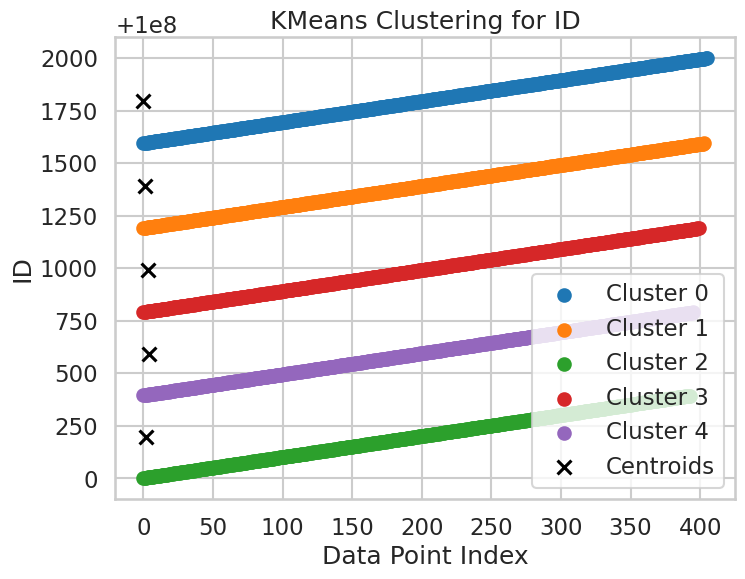

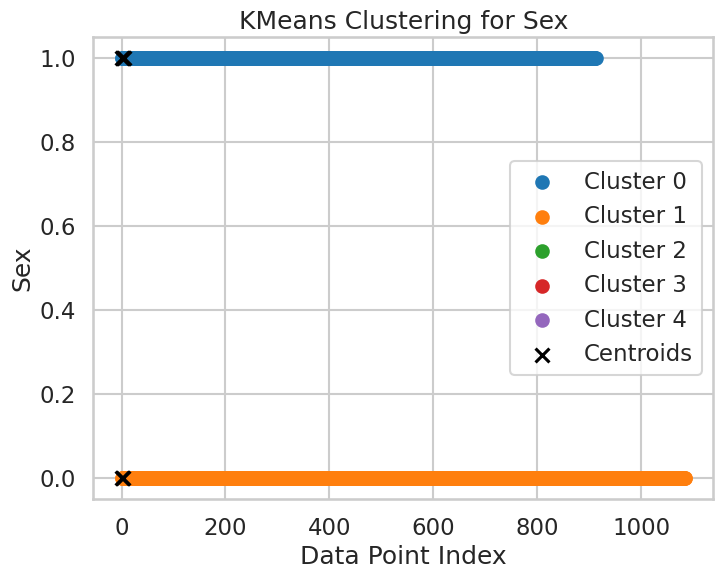

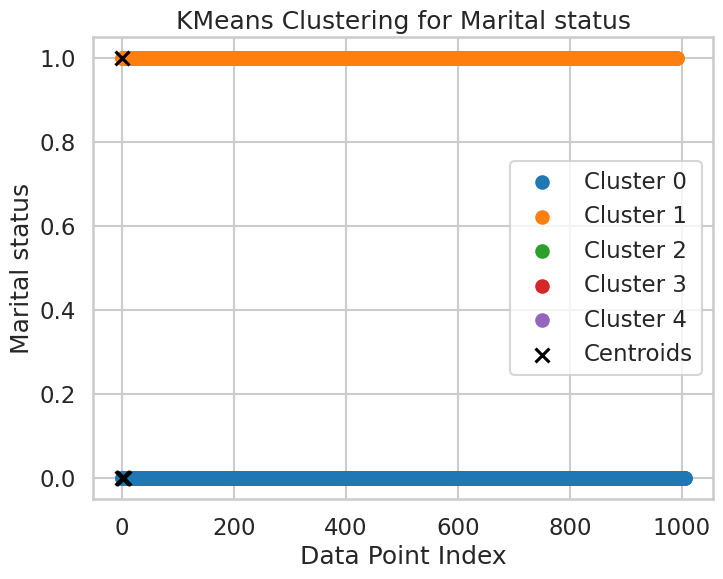

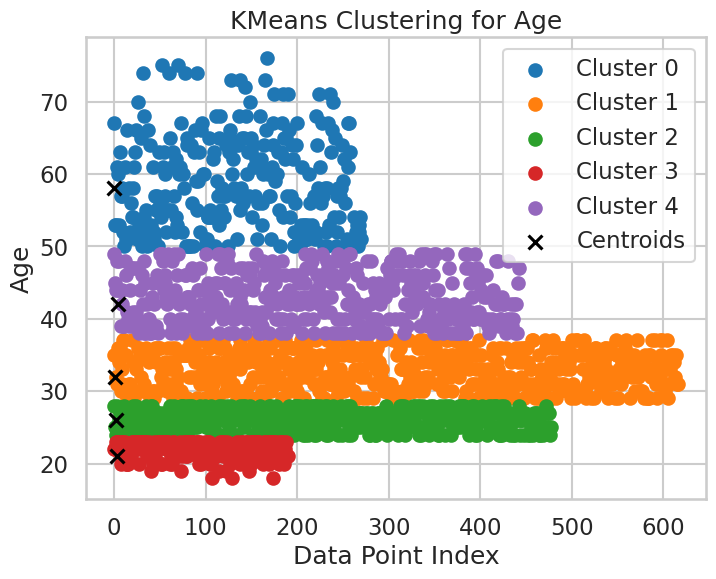

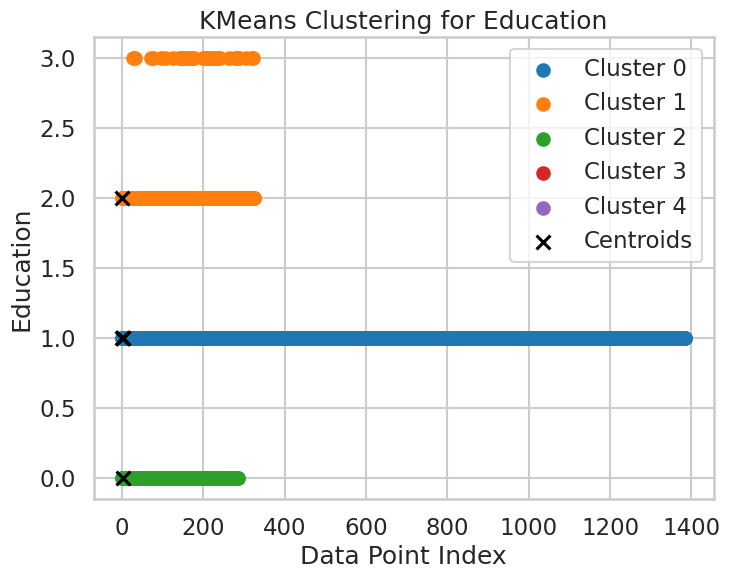

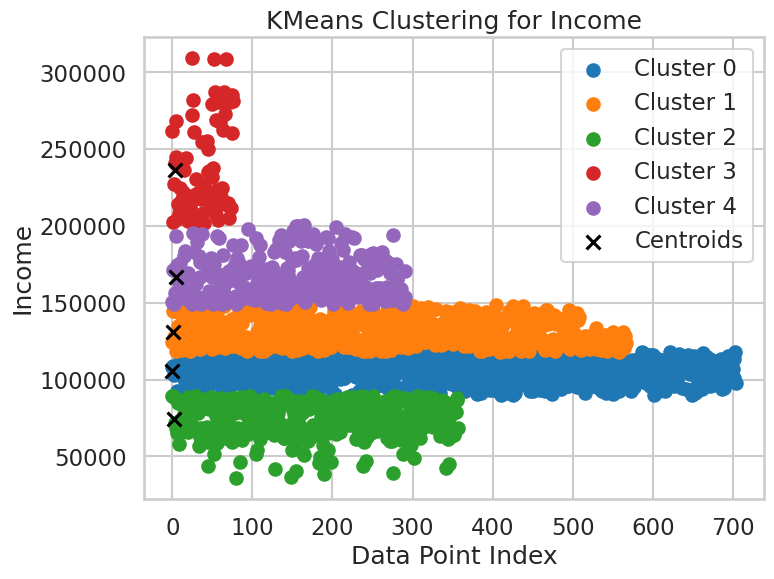

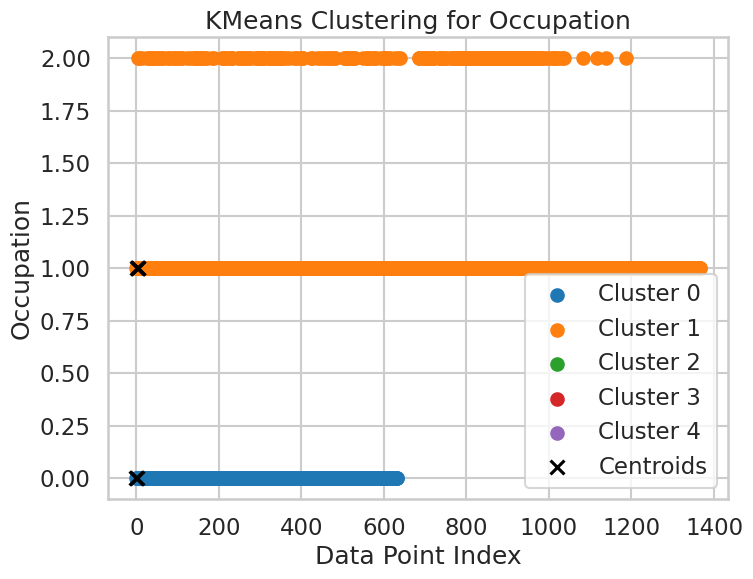

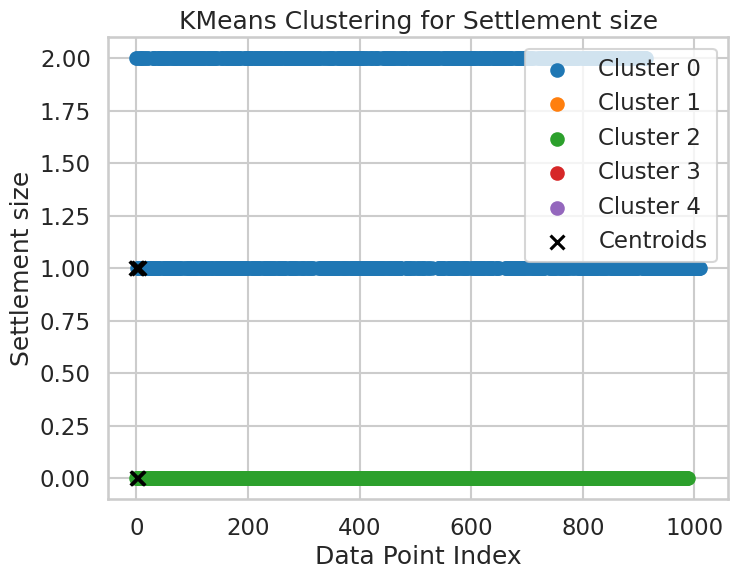

In [54]:
cluster_assignments_all = {}
cluster_centroids_all = {}
for feature_name in customer_df.columns:
    feature_data = customer_df[feature_name].values.reshape(-1, 1)  # Reshape to have a 2D array
    cluster_centroids, cluster_assignments = GUC_Kmeans(feature_data, k=5)  # Assuming k=5 clusters
    cluster_centroids_all[feature_name] = cluster_centroids
    cluster_assignments_all[feature_name] = cluster_assignments

# Plot the clusters for each feature individually
for feature_name, centroids in cluster_centroids_all.items():
    plt.figure(figsize=(8, 6))
    feature_data = customer_df[feature_name].values
    for i in range(len(centroids)):
        cluster_points = feature_data[cluster_assignments_all[feature_name] == i]
        plt.scatter(range(len(cluster_points)), cluster_points, label=f'Cluster {i}')
    plt.scatter(range(len(centroids)), centroids, color='black', marker='x', s=100, label='Centroids')
    plt.xlabel('Data Point Index')
    plt.ylabel(feature_name)
    plt.title(f'KMeans Clustering for {feature_name}')
    plt.legend()
    plt.show()